In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [123]:
def get_data():
    breastcerdt = load_breast_cancer()
    X = pd.DataFrame(breastcerdt.data,columns = breastcerdt.feature_names).values
    Y = breastcerdt.target
    Y = Y.reshape(Y.shape[0],1)
    x = np.ones((X.shape[0],1))
    X = np.insert(X,0,x,1)
    return X,Y

In [124]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [125]:
def get_params(num_features):
    return np.zeros((num_features,1))

In [126]:
def cost(Y_pred,Y):
    return -((1-Y)*np.log(1-Y_pred)+Y*np.log(Y_pred)).sum()

In [127]:
def get_Y_pred(params,X):
    return sigmoid(X@params)

In [128]:
def grad_descent(params,X_train,Y_train,learnin_rt,num_itr):
    m = X_train.shape[0]
    L_cost = np.zeros((num_itr,1)) 
    for i in range(num_itr):
        
        Y_pred = get_Y_pred(params,X_train)
        params = params - (X_train.T@(Y_pred - Y_train)*learnin_rt)/m
        L_cost[i] = cost(Y_pred,Y_train) 
    plt.plot(range(num_itr),L_cost,'g')
    plt.title("Cost vs num_itr")
    plt.xlabel("num_itr")
    plt.ylabel("Cost")
    sns.despine()
    plt.show()
    return params
   
        
        
    

In [129]:
X,Y=get_data()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
params = get_params(X_train.shape[1])


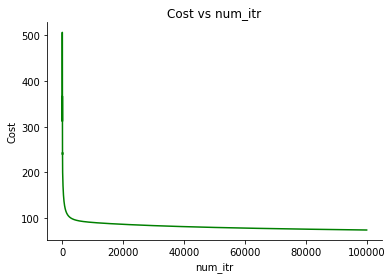

In [130]:
params = grad_descent(params,X_train,Y_train,0.000008,100000)

In [131]:
cost(get_Y_pred(params,X_test),Y_test)

18.33124222925418

In [138]:
get_Y_pred(params,X_test[77])

array([0.96688182])

In [139]:
Y_test[77]

array([1])

In [147]:
y2 =  (get_Y_pred(params, X_test)>0.5).astype(int)
yt2 =  (get_Y_pred(params, X_train)>0.5).astype(int)

In [148]:
y3 = Y_test == y2
yt3 = Y_train == yt2

In [151]:
print("Test Accuracy: {}".format(round(y3.sum()*100/len(y3), 2)))
print("Train Accuracy: {}".format(round(yt3.sum()*100/len(yt3), 2)))

Test Accuracy: 92.98
Train Accuracy: 93.63


In [ ]:
COST(get_Y_)